In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [3]:
from qiskit import *
from qiskit.tools.visualization import *

Enter the secret number: 111


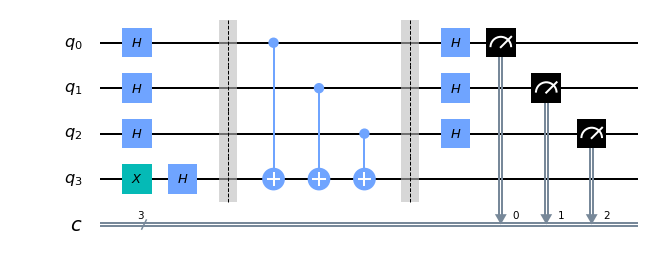

In [47]:
n = 3
secretnumber = input("Enter the secret number: ")
circuit = QuantumCircuit(n+1,n)
for i in range(n):
    circuit.h(i)
circuit.x(n)
circuit.h(n)
circuit.barrier()
secretnumber = secretnumber[::-1]
for q in range(n):
    if secretnumber[q] == '0':
        circuit.i(q)
    else:
        circuit.cx(q, n)
circuit.barrier()
for j in range(n):
    circuit.h(j)
for k in range(n):
    circuit.measure(k,k)
circuit.draw()

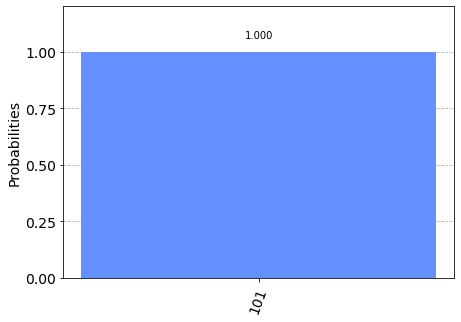

In [42]:
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circuit,backend,shots=1).result()
counts = result.get_counts()
plot_histogram(counts)

In [50]:
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
real_device = provider.get_backend('ibmq_london')
properties = real_device.properties()
coupling_map = real_device.configuration().coupling_map
from qiskit.providers.aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(properties)
from qiskit.tools.monitor import job_monitor
job = execute(circuit, backend=backend, shots=1)
job_monitor(job, interval = 2)

Job Status: job has successfully run


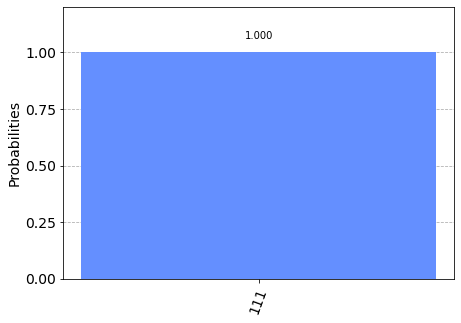

In [51]:

results = job.result()
answer = results.get_counts()

plot_histogram(answer)